In [59]:
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

map = np.genfromtxt("input06.txt", dtype=str, delimiter=1, comments=None)

5095

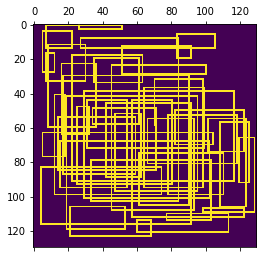

In [61]:
step = {0: np.array([-1,0]), 1: np.array([0,1]),
        2:np.array([1,0]), 3:np.array([0,-1])} #0,1,2,3 for up, right, down, left

def circulate(map):
    pos, direction = np.argwhere(map=="^")[0], 0
    tread = np.zeros(map.shape, dtype=bool)
    tread[tuple(pos)] = True

    while True:
        nextpos = pos + step[direction]
        if (nextpos < 0).any() or (nextpos >= map.shape).any(): return tread
        if map[tuple(nextpos)] == "#":
            direction = (direction+1) %4
            continue
        pos = nextpos
        tread[tuple(pos)] = True

tread = circulate(map)
plt.matshow(tread);
tread.sum()

Part II

In [62]:
def runsintocycle(map):
    pos, direction = tuple(np.argwhere(map=="^")[0]), 0
    turns = {pos: [direction]}

    while True:
        i,j = pos
        #maybe the following could be optimized, like pos[direction%2] = ..., but it's overoptimizing code length
        if direction == 0:
            straightahead = map[:i, j]
            if "#" not in straightahead: return False
            pos = (np.argwhere(straightahead=="#")[-1][0]+1, j)
        elif direction == 1:
            straightahead = map[i, j+1:]
            if "#" not in straightahead: return False
            pos = (i, j+np.argwhere(straightahead=="#")[0][0])
        elif direction == 2:
            straightahead = map[i+1:, j]
            if "#" not in straightahead: return False
            pos = (i+np.argwhere(straightahead=="#")[0][0], j)
        elif direction == 3:
            straightahead = map[i, :j]
            if "#" not in straightahead: return False
            pos = (i, np.argwhere(straightahead=="#")[-1][0]+1)
        else:
            raise ValueError("direction not in [0,1,2,3]")

        direction = (direction+1) %4
        if pos in turns:
            if direction in turns[pos]: return True
            turns[pos].append(direction)
        else: turns.update({pos: [direction]})

129

1933

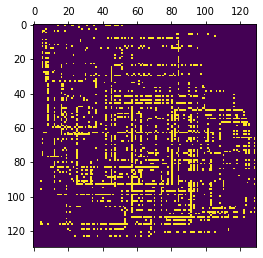

In [66]:
ct=0
tread[tuple(np.argwhere(map=="^")[0])] = False #cannot place "#" on initial position
cycler_obstacles = np.zeros(map.shape)

for i in range(map.shape[0]):
    print("\r"+str(i), end="")
    for j in range(map.shape[1]):
        if tread[i,j]:
            newmap = map.copy()
            newmap[i,j] = "#"
            cyc = runsintocycle(newmap)
            ct += cyc
            cycler_obstacles[i,j] = cyc
plt.matshow(cycler_obstacles)
ct

In [ ]:
#Two variants that take much longer (10min total x 15s, 40 times longer)
def runsintocycle(map):
    pos, direction = np.argwhere(map=="^")[0], 0
    tread = [[[] for _ in range(map.shape[0])] for __ in range(map.shape[1])]
    tread[pos[0]][pos[1]].append(direction)

    while True:
        nextpos = pos + step[direction]
        if (nextpos < 0).any() or (nextpos >= map.shape).any(): return False
        if direction in tread[nextpos[0]][nextpos[1]]: return True
        if map[tuple(nextpos)] == "#":
            direction = (direction+1) %4
            tread[pos[0]][pos[1]].append(direction)
            continue
        tread[nextpos[0]][nextpos[1]].append(direction)
        pos = nextpos

def runsintocycle(map):
    pos, direction = np.argwhere(map=="^")[0], 0
    tread = [[[] for _ in range(map.shape[0])] for __ in range(map.shape[1])]
    tread[pos[0]][pos[1]].append(direction)

    while True:
        nextpos = pos + step[direction]
        while True:
            if (nextpos < 0).any() or (nextpos >= map.shape).any(): return False
            if map[tuple(nextpos)] == "#": break
            pos     =     pos + step[direction]
            nextpos = nextpos + step[direction]

        direction = (direction+1) %4
        if direction in tread[pos[0]][pos[1]]: return True     
        tread[pos[0]][pos[1]].append(direction)